In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import csv file
df = pd.read_csv('data/cleaned_data.csv')
df.head(1)

,Unnamed: 0,Unnamed: 0.1,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,Country Code,Days to trend
0,0,0,2kyS6SvSYSE,2017-11-14,22,2017-11-13,748374,57527,2966,15954,US,1 days 00:00:00.000000000


In [4]:
#drop columns I know I will not be looking at
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'trending_date', 'category_id', 'publish_time', 'Days to trend' ], axis=1)
df.head(1)

,video_id,views,likes,dislikes,comment_count,Country Code
0,2kyS6SvSYSE,748374,57527,2966,15954,US


In [5]:
#find the max values of views, likes, dislikes, and comments for each video_id
df = pd.DataFrame(df.groupby(['video_id']).max())
df.head(1)

,views,likes,dislikes,comment_count,Country Code
video_id,,,,,
--1skHapGUc,30914,483,77,81,MX


In [6]:
#add column for total likes and dislikes
df['Total Likes and Dislikes'] = df['likes'] + df['dislikes']
df.head(1)

,views,likes,dislikes,comment_count,Country Code,Total Likes and Dislikes
video_id,,,,,,
--1skHapGUc,30914,483,77,81,MX,560


In [7]:
#add column for percentage of likes among likes/dislikes
df['Likes/Dislikes Ratio'] = df['likes'] / df['dislikes']
df.head(1)

,views,likes,dislikes,comment_count,Country Code,Total Likes and Dislikes,Likes/Dislikes Ratio
video_id,,,,,,,
--1skHapGUc,30914,483,77,81,MX,560,6.272727


In [8]:
#add column for how many views each video received per like/dislike, rounded to two digits
df['View per (dis)like'] = round(df['views'] / df['Total Likes and Dislikes'], 2)
df.head(1)

,views,likes,dislikes,comment_count,Country Code,Total Likes and Dislikes,Likes/Dislikes Ratio,View per (dis)like
video_id,,,,,,,,
--1skHapGUc,30914,483,77,81,MX,560,6.272727,55.2


In [9]:
#find outliers for number of views
views_q1 = np.percentile(df['views'], 25) #find lower and upper quartiles 
views_q3 = np.percentile(df['views'], 75)
views_qrange = (views_q3 - views_q1) #find interquartile range
views_lower =  views_q1 - (1.5 * views_qrange) #lower boundry
views_upper = views_q3 + (1.5 * views_qrange) #upper boundry
df['outliers'] = (df['views'] < views_lower) | (df['views'] > views_upper) #find outliers
df = df[df['outliers'] == False]
df.head(1)


,views,likes,dislikes,comment_count,Country Code,Total Likes and Dislikes,Likes/Dislikes Ratio,View per (dis)like,outliers
video_id,,,,,,,,,
--1skHapGUc,30914,483,77,81,MX,560,6.272727,55.2,False


In [10]:
#find outliers for Likes/Dislikes ratio
ratio_q1 = np.percentile(df['Likes/Dislikes Ratio'], 25) #find lower and upper quartiles 
ratio_q3 = np.percentile(df['Likes/Dislikes Ratio'], 75)
ratio_qrange = (ratio_q3 - ratio_q1) #find interquartile range
ratio_lower =  ratio_q1 - (1.5 * ratio_qrange) #lower boundry
ratio_upper = ratio_q3 + (1.5 * ratio_qrange) #upper boundry
df['outliers'] = (df['Likes/Dislikes Ratio'] < ratio_lower) |(df['Likes/Dislikes Ratio'] > ratio_upper) #find outliers
df = df[df['outliers'] == False]
df.head(1)

,views,likes,dislikes,comment_count,Country Code,Total Likes and Dislikes,Likes/Dislikes Ratio,View per (dis)like,outliers
video_id,,,,,,,,,
--1skHapGUc,30914,483,77,81,MX,560,6.272727,55.2,False


In [11]:
#pull random sample of 600 row index numbers of the df
random_index = np.random.uniform(low=0, high=(len(df) - 1), size=600) #find 600 random numbers
random_index1 = [] #round each number to 0 decimals 
for x in random_index: 
    b = round(x, 0)
    random_index1.append(b)
random_index = [] #clear original list
for x in random_index1: #convert list into integers
    random_index.append(int(x))
views = [] #crete empty lists for each category we will be charting
likes_ratio = []
view_per_like = []

for x in random_index: #for each random number in my list, pull the row index into a list
    views.append(df['views'][x])
    likes_ratio.append(df['Likes/Dislikes Ratio'][x])
    view_per_like.append(df['View per (dis)like'][x])


In [12]:
#check if data is a good representation of the overall population
_, view_p = stats.ttest_1samp(views, df['views'].mean())
_, like_p = stats.ttest_1samp(likes_ratio, df['Likes/Dislikes Ratio'].mean())
_, per_p = stats.ttest_1samp(view_per_like, df['View per (dis)like'].mean())
print(f'{view_p}, {like_p}, {per_p}') #as long as each printed value is above 0.05 we can NOT reject the null hypothesis of the sample being from a different population

0.7394071340074603, 0.8488668766332965, 0.21268261239025948


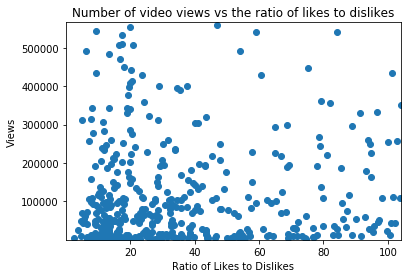

In [13]:
#create scatter plot comparing views to the ratio of likes to dislikes
plt.scatter(view_per_like, views)
plt.ylim(df['views'].min(), df['views'].max())
plt.xlim(df['Likes/Dislikes Ratio'].min(), df['Likes/Dislikes Ratio'].max())
plt.xlabel('Ratio of Likes to Dislikes')
plt.ylabel('Views')
plt.title('Number of video views vs the ratio of likes to dislikes')
plt.savefig('images/viewsvsratio.png')
plt.show()

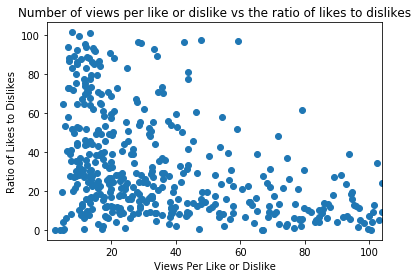

In [14]:
plt.scatter(view_per_like, likes_ratio)
plt.ylabel('Ratio of Likes to Dislikes')
plt.xlabel('Views Per Like or Dislike')
plt.xlim(df['Likes/Dislikes Ratio'].min(), df['Likes/Dislikes Ratio'].max())
plt.title('Number of views per like or dislike vs the ratio of likes to dislikes')
plt.savefig('images/perlikevsratio.png')
#plt.ylim(df['View per (dis)like'].min(), df['View per (dis)like'].max())
plt.show()